In [69]:
word.real <- "word_list_real.txt"
word.random <- "word_list_random.txt"

data <- read.table(word.real)


In [70]:
head(data) #26MB

V1,V2,V3
<fct>,<int>,<fct>
CTCTTA,1,FBgn0000008
TCTTAA,2,FBgn0000008
CTTAAA,3,FBgn0000008
TTAAAA,4,FBgn0000008
TAAAAT,5,FBgn0000008
AAAATT,6,FBgn0000008


In [71]:
counts <- table(data$V1) #count frequencies
#top 15 most frequent words
top <- head(sort(counts, decreasing=T),15)
top.words <- names(top)

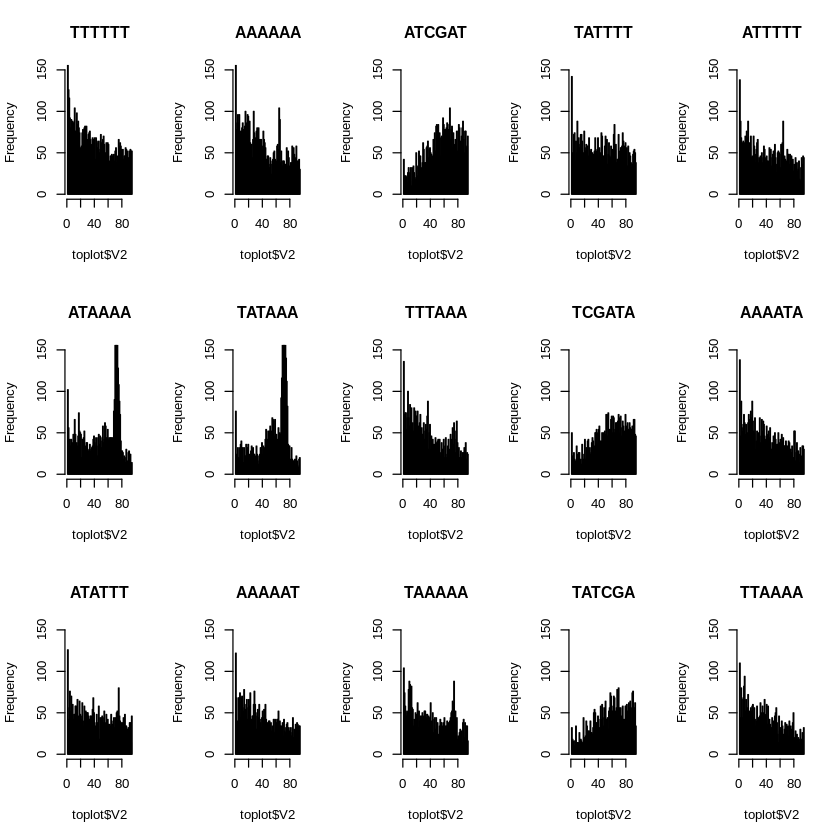

In [72]:
#plot histograms of words
par(mfrow=c(3,5))
for (i in top.words) {
    toplot = subset (data, V1 == i)  #get one of the top words
    hist(toplot$V2, breaks = 1:95, main=i, ylim=c(0,150))  
}

In [73]:
#now for random data

In [74]:
dataRand <- read.table(word.random)
Randcounts <- table(dataRand$V1) #count frequencies
Randtop <- head(sort(Randcounts, decreasing=T),15)
Randtop.words <- names(Randtop)

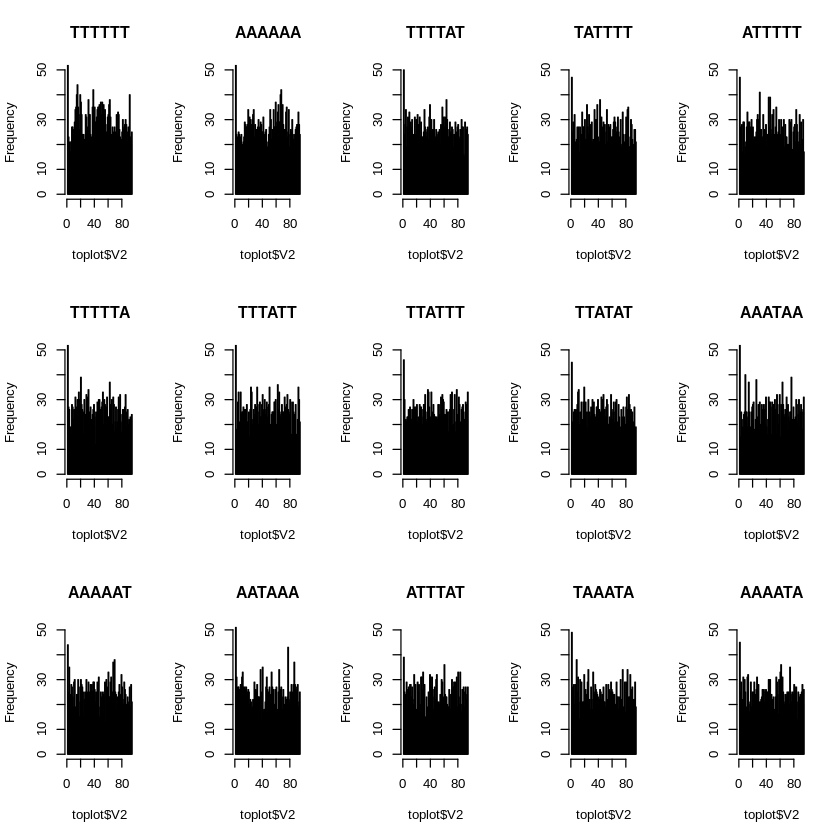

In [75]:
par(mfrow=c(3,5))
for (i in Randtop.words) {
    toplot = subset (dataRand, V1 == i)  #get one of the top words
    hist(toplot$V2, breaks = 1:95, main=i, ylim=c(0,50))  
    }

In [150]:
real.words = as.character(unique(data$V1))
rand.words = as.character(unique(dataRand$V1))

In [151]:
#the length is different!! why?
c(length(real.words), length(rand.words))

[1] 4107 4342

In [152]:
c ( sum(real.words %in% rand.words),
   sum(rand.words %in% real.words))

[1] 4100 4100

In [153]:
#To avoid missing words, we merge just the heads of the 2 data tables

merged <- merge(as.data.frame(counts), 
            as.data.frame(Randcounts),  
            all.x = T,
            all.y = T,
            by = "Var1")

In [154]:
#skipping NA's:

mergedClean <- merge(as.data.frame(counts), 
                     as.data.frame(Randcounts), 
                     by="Var1")

In [155]:
sum(is.na(mergedClean))

[1] 0

In [156]:
head(mergedClean)

Var1,Freq.x,Freq.y
<fct>,<int>,<int>
AAAAAA,5612,2563
AAAAAC,2690,1389
AAAAAG,2274,1348
AAAAAT,4098,2330
AAAACA,2662,1448
AAAACC,1392,880


In [157]:
#total number of sequences:
total.obs <- dim(data)[1]
total.obs

[1] 2646890

In [158]:
pvalue <- apply(mergedClean, 1, function(x)
    prop.test(c(as.numeric(x[2]), as.numeric(x[3])) , 
        c(2646890,2646890))$p.value)

Warning message in prop.test(c(as.numeric(x[2]), as.numeric(x[3])), c(2646890, 2646890)):
“Chi-squared approximation may be incorrect”Warning message in prop.test(c(as.numeric(x[2]), as.numeric(x[3])), c(2646890, 2646890)):
“Chi-squared approximation may be incorrect”

In [160]:
mergedClean$pvalue <- pvalue
mergedClean

Var1,Freq.x,Freq.y,pvalue
<fct>,<int>,<int>,<dbl>
AAAAAA,5612,2563,1.657453e-249
AAAAAC,2690,1389,3.587935e-92
AAAAAG,2274,1348,2.407107e-53
AAAAAT,4098,2330,8.992294e-108
AAAACA,2662,1448,6.684904e-80
AAAACC,1392,880,7.952065e-27
AAAACG,1304,837,7.261233e-24
AAAACT,1932,1270,1.523947e-31
AAAAGA,1462,1434,6.157654e-01


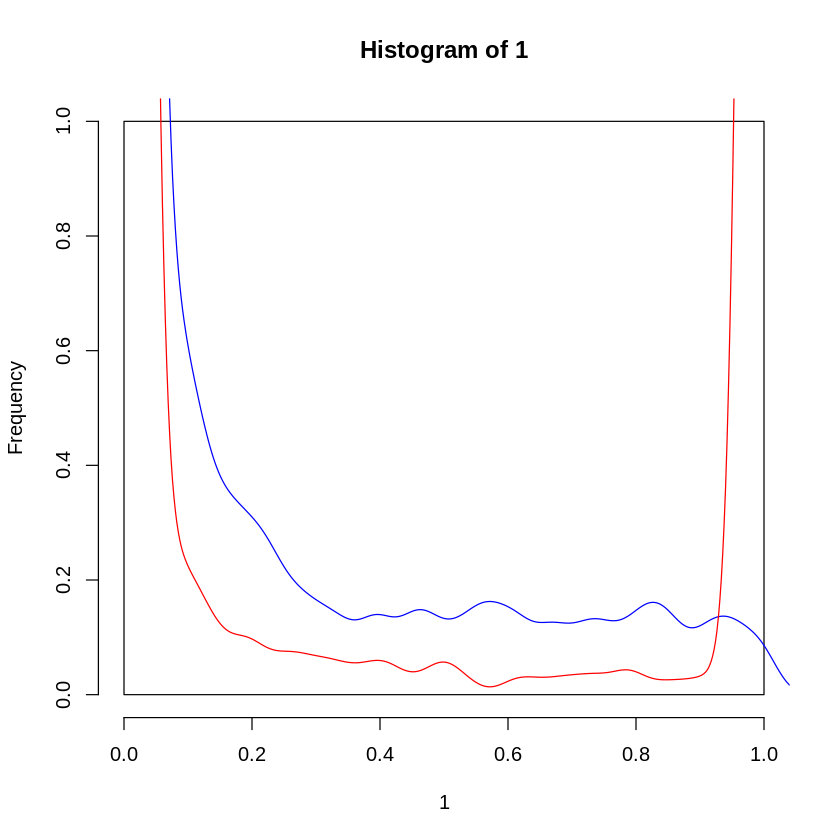

In [161]:
#apply Bonferroni correction for large samples:

p.adj <- p.adjust(pvalue, method = "bonferroni", n = length(pvalue))

hist(1,1)
lines(density(pvalue, width = 0.1), col = "blue")
lines(density(p.adj, width = 0.1), col = "red")

In [143]:
# filter our dataset

dim(subset(mergedClean, pvalue<0.05))

[1] 3291    4

In [162]:
mergedClean$adjp = p.adj

In [163]:
head(mergedClean)

Var1,Freq.x,Freq.y,pvalue,adjp
<fct>,<int>,<int>,<dbl>,<dbl>
AAAAAA,5612,2563,1.657453e-249,6.795556e-246
AAAAAC,2690,1389,3.587935e-92,1.471053e-88
AAAAAG,2274,1348,2.407107e-53,9.869140e-50
AAAAAT,4098,2330,8.992294e-108,3.686841e-104
AAAACA,2662,1448,6.684904e-80,2.740810e-76
AAAACC,1392,880,7.952065e-27,3.260347e-23


In [167]:
#let's rank for pvalue significance:
head(mergedClean[order(mergedClean$adjp),],15)

,Var1,Freq.x,Freq.y,pvalue,adjp
,<fct>,<int>,<int>,<dbl>,<dbl>
868,ATCGAT,5202,785,0.000000e+00,0.000000e+00
3293,TATCGA,3928,756,0.000000e+00,0.000000e+00
3473,TCGATA,4240,763,0.000000e+00,0.000000e+00
1183,CAGCTG,2228,390,2.031537e-282,8.329302e-279
4100,TTTTTT,6034,2726,6.464369e-274,2.650391e-270
1587,CGATAG,2310,494,1.318400e-257,5.405438e-254
1,AAAAAA,5612,2563,1.657453e-249,6.795556e-246
1847,CTATCG,2100,469,5.105035e-227,2.093064e-223
3332,TATTTT,5164,2427,9.157920e-217,3.754747e-213


In [171]:
#or 
mergedClean <- mergedClean %>% arrange(adjp)

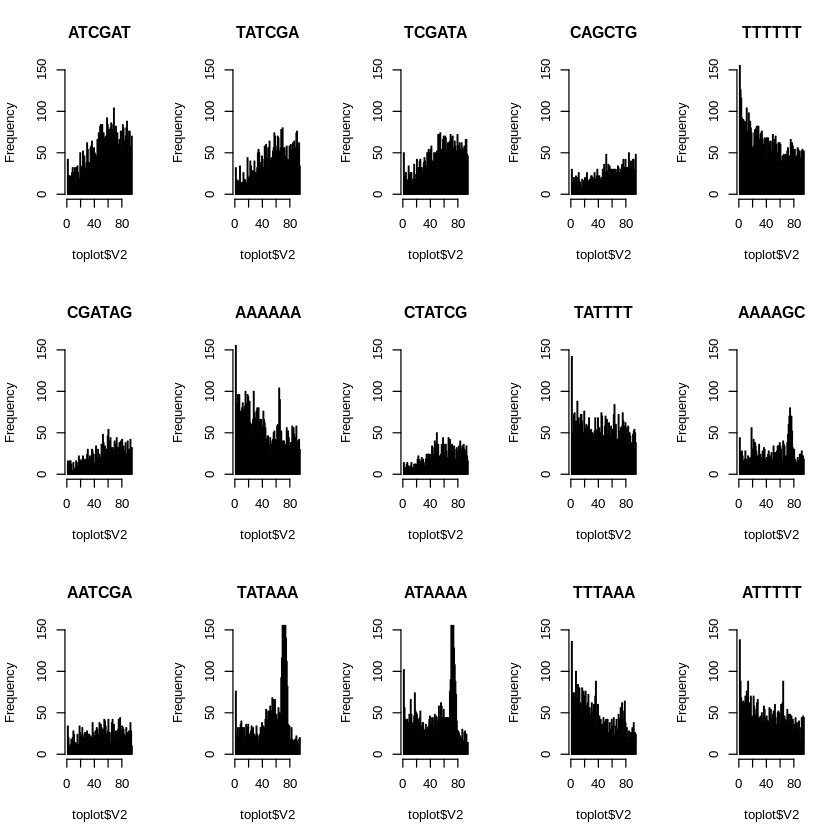

In [176]:
par(mfrow = c(3,5))
for (i in mergedClean$Var1[1:15]) {
    toplot = subset (data, V1 == i)  #get one of the top words
    hist(toplot$V2, breaks = 1:95, main=i, ylim=c(0,150)) 
}

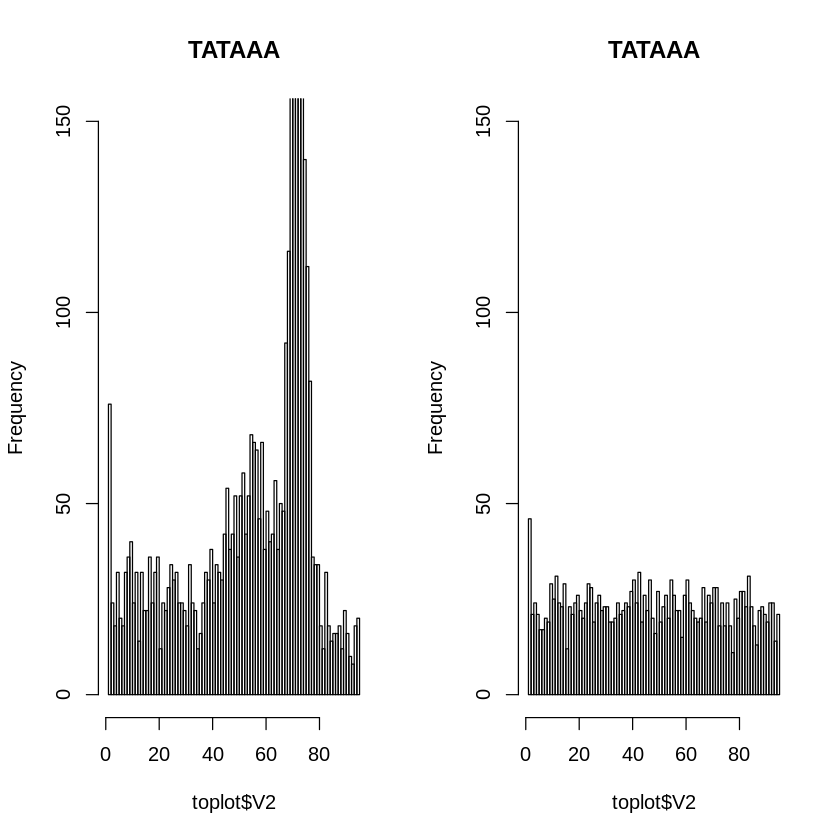

In [178]:
# now we compare positions, to see if a word is enriched in any given position:

par(mfrow=c(1,2))

i = "TATAAA"
toplot = subset(data, V1 ==i)
hist(toplot$V2, breaks = 1:95, main=i, ylim=c(0,150)) 


toplot = subset(dataRand, V1 ==i)
hist(toplot$V2, breaks = 1:95, main=i, ylim=c(0,150)) 

In [179]:
# with hist (... plot = F) you get the raw histogram data

par(mfrow=c(1,2))

i = "TATAAA"
toplot = subset(data, V1 ==i)
hist(toplot$V2, breaks = 1:95, main=i, ylim=c(0,150), plot=F) 


toplot = subset(dataRand, V1 ==i)
hist(toplot$V2, breaks = 1:95, main=i, ylim=c(0,150), plot=F) 


Warning message in hist.default(toplot$V2, breaks = 1:95, main = i, ylim = c(0, :
“arguments ‘main’, ‘ylim’ are not made use of”

$breaks
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
[51] 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
[76] 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95

$counts
 [1]  76  24  18  32  20  18  32  36  40  24  32  14  32  22  22  36  24  32  36
[20]  12  24  22  28  34  30  32  24  24  22  18  34  24  22  12  16  24  32  30
[39]  38  24  34  32  30  42  54  38  42  52  36  52  58  42  52  68  66  64  46
[58]  66  38  48  40  42  56  38  50  48  92 116 190 296 218 312 174 140 112  82
[77]  36  34  34  18  12  32  18  14  16  16  18  12  22  16  10   8  18  20

$density
 [1] 0.017210145 0.005434783 0.004076087 0.007246377 0.004528986 0.004076087
 [7] 0.007246377 0.008152174 0.009057971 0.005434783 0.007246377 0.003170290
[13] 0.007246377 0.004981884 0.004981884 0.008152174 0.005434783 0.007246377
[19] 0.008152174 0.002717391 0.00543

Warning message in hist.default(toplot$V2, breaks = 1:95, main = i, ylim = c(0, :
“arguments ‘main’, ‘ylim’ are not made use of”

$breaks
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
[51] 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
[76] 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95

$counts
 [1] 46 21 24 21 17 17 20 19 29 25 31 24 23 29 12 23 21 24 26 22 20 24 29 28 19
[26] 24 26 22 23 23 19 19 20 24 21 22 24 23 27 30 24 32 19 26 22 30 20 16 27 19
[51] 23 26 20 30 26 22 22 15 26 30 24 22 20 19 20 28 19 26 24 28 28 18 24 18 24
[76] 18 11 25 20 27 27 23 31 23 18 13 22 23 21 19 24 24 14 21

$density
 [1] 0.021276596 0.009713228 0.011100833 0.009713228 0.007863090 0.007863090
 [7] 0.009250694 0.008788159 0.013413506 0.011563367 0.014338575 0.011100833
[13] 0.010638298 0.013413506 0.005550416 0.010638298 0.009713228 0.011100833
[19] 0.012025902 0.010175763 0.009250694 0.011100833 0.013413506 0.012950971
[25] 0.008788159 0.011100833 0.012025902 0.010175763 0.010

In [193]:
# reduce the dataset..
selected = as.character(subset(mergedClean, Freq.x>500)$Var1)
head(selected)

[1] "ATCGAT" "TATCGA" "TCGATA" "CAGCTG" "TTTTTT" "CGATAG"

In [195]:
# on file, to avoid RAM overflow
length(unique(mergedClean$Var1))

[1] 4100

In [196]:
for (i in selected) {
    res=c()
    res$word = rep (i, 94)
    res$position=1:94
    res$real= hist(subset(data, V1==i)$V2, breaks=1:95, plot=F)$counts
    res$rand= hist(subset(dataRand, V1==i)$V2, breaks=1:95, plot=F)$counts
    res = as.data.frame(res)
    write(t(res), file='positions.txt', sep='\t', ncolumns=4, append=T)
    
}

In [198]:
res = read.table('positionsRemo.txt', header=F)

In [200]:
names(res) = c("word", "position", "real", "rand")
head(res)

word,position,real,rand
<fct>,<int>,<int>,<int>
AAAAAA,1,95,28
AAAAAA,2,39,13
AAAAAA,3,43,11
AAAAAA,4,48,12
AAAAAA,5,43,17
AAAAAA,6,48,15


In [204]:
total.seq <- total.obs / 95
total.seq

[1] 27862

In [215]:
options(warn=-1)
pvalue <- apply(res, 1, function(x)
                        prop.test(c(as.numeric(x[3]), as.numeric(x[4])), c(total.seq,total.seq))$p.value)
res$pvalue <- pvalue

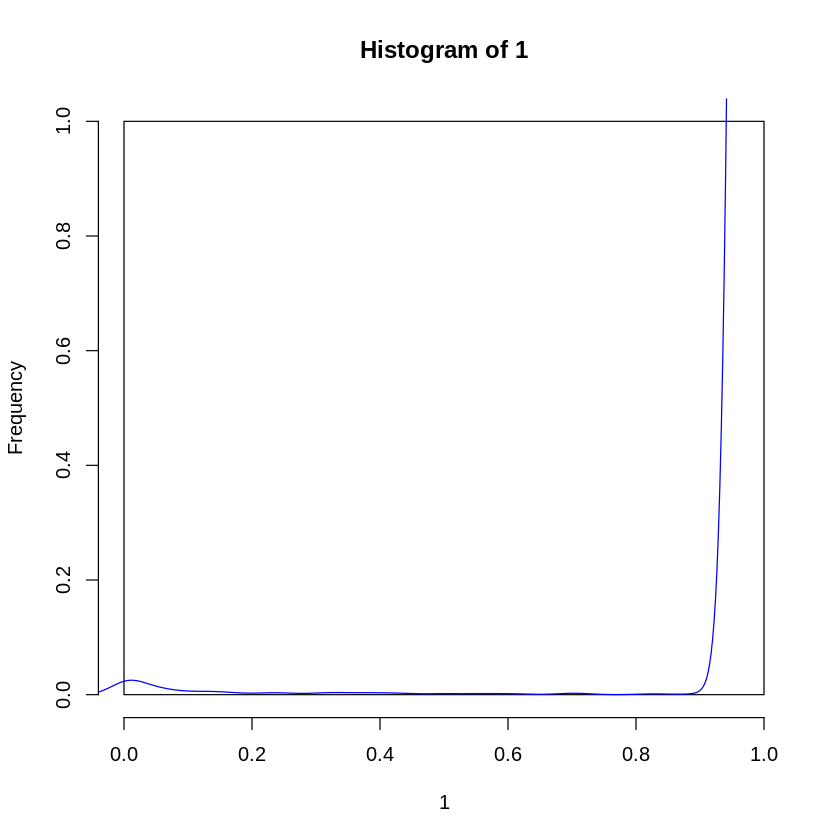

In [214]:
res$adjp <- adjp <- p.adjust(pvalue, method = "bonferroni")
hist(1,1)
lines(density(adjp[!is.na(adjp)], width = 0.1), col = "blue")


In [216]:
res = res[order(res$adjp),]

In [218]:
head(res, 10)

,word,position,real,rand,adjp,pvalue
,<fct>,<int>,<int>,<int>,<dbl>,<dbl>
34852,TATAAA,72,156,10,9.298506e-25,1.825205e-29
34850,TATAAA,70,148,13,1.962279e-21,3.851760e-26
13139,ATAAAA,73,99,10,1.656897e-12,3.252326e-17
13138,ATAAAA,72,101,12,5.929227e-12,1.163849e-16
34851,TATAAA,71,109,16,8.923001e-12,1.751497e-16
30433,GTATAA,71,74,2,1.856803e-11,3.644722e-16
34849,TATAAA,69,95,12,1.073570e-10,2.107311e-15
13136,ATAAAA,70,79,6,2.789895e-10,5.476288e-15
34853,TATAAA,73,87,10,5.772386e-10,1.133062e-14


The most significant are, as expected, TATA box signatures.

In [219]:
unique(res$word)[1:15]

[1] TATAAA ATAAAA GTATAA ATAAAT CTATAA TAAAAG ATCGAT TTTTTT ATATAA AAAAAA
[11] AAAAGC CTCTCT TAAATA TATATA TATCGA
542 Levels: AAAAAA AAAAAC AAAAAG AAAAAT AAAACA AAAACC AAAACG AAAACT ... TTTTTT